In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#demo_cols = ['diagnosis', 'age', 'gender', 'eTIV']

features_cort = ['thickness_bankssts_lh',  'thickness_caudalanteriorcingulate_lh', 'thickness_caudalmiddlefrontal_lh',  'thickness_cuneus_lh',  'thickness_entorhinal_lh',  'thickness_fusiform_lh',  'thickness_inferiorparietal_lh',  'thickness_inferiortemporal_lh',  'thickness_isthmuscingulate_lh',  'thickness_lateraloccipital_lh',  'thickness_lateralorbitofrontal_lh',  'thickness_lingual_lh',  'thickness_medialorbitofrontal_lh',  'thickness_middletemporal_lh',  'thickness_parahippocampal_lh',  'thickness_paracentral_lh',  'thickness_parsopercularis_lh',  'thickness_parsorbitalis_lh',  'thickness_parstriangularis_lh',  'thickness_pericalcarine_lh',  'thickness_postcentral_lh',  'thickness_posteriorcingulate_lh',  'thickness_precentral_lh',  'thickness_precuneus_lh',  'thickness_rostralanteriorcingulate_lh', 'thickness_rostralmiddlefrontal_lh',  'thickness_superiorfrontal_lh',  'thickness_superiorparietal_lh',  'thickness_superiortemporal_lh',  'thickness_supramarginal_lh',  'thickness_frontalpole_lh',  'thickness_temporalpole_lh',  'thickness_transversetemporal_lh',  'thickness_insula_lh',  'thickness_bankssts_rh',  'thickness_caudalanteriorcingulate_rh', 'thickness_caudalmiddlefrontal_rh',  'thickness_cuneus_rh',  'thickness_entorhinal_rh',  'thickness_fusiform_rh',  'thickness_inferiorparietal_rh',  'thickness_inferiortemporal_rh',  'thickness_isthmuscingulate_rh',  'thickness_lateraloccipital_rh',  'thickness_lateralorbitofrontal_rh',  'thickness_lingual_rh',  'thickness_medialorbitofrontal_rh',  'thickness_middletemporal_rh',  'thickness_parahippocampal_rh',  'thickness_paracentral_rh',  'thickness_parsopercularis_rh',  'thickness_parsorbitalis_rh',  'thickness_parstriangularis_rh',  'thickness_pericalcarine_rh',  'thickness_postcentral_rh',  'thickness_posteriorcingulate_rh',  'thickness_precentral_rh',  'thickness_precuneus_rh',  'thickness_rostralanteriorcingulate_rh', 'thickness_rostralmiddlefrontal_rh',  'thickness_superiorfrontal_rh',  'thickness_superiorparietal_rh',  'thickness_superiortemporal_rh',  'thickness_supramarginal_rh',  'thickness_frontalpole_rh',  'thickness_temporalpole_rh',  'thickness_transversetemporal_rh',  'thickness_insula_rh']

features_vol = ['volume_bankssts_lh', 'volume_caudalanteriorcingulate_lh', 'volume_caudalmiddlefrontal_lh', 'volume_cuneus_lh', 'volume_entorhinal_lh', 'volume_fusiform_lh', 'volume_inferiorparietal_lh', 'volume_inferiortemporal_lh', 'volume_isthmuscingulate_lh', 'volume_lateraloccipital_lh', 'volume_lateralorbitofrontal_lh', 'volume_lingual_lh', 'volume_medialorbitofrontal_lh', 'volume_middletemporal_lh', 'volume_parahippocampal_lh', 'volume_paracentral_lh', 'volume_parsopercularis_lh', 'volume_parsorbitalis_lh', 'volume_parstriangularis_lh', 'volume_pericalcarine_lh', 'volume_postcentral_lh', 'volume_posteriorcingulate_lh', 'volume_precentral_lh', 'volume_precuneus_lh', 'volume_rostralanteriorcingulate_lh', 'volume_rostralmiddlefrontal_lh', 'volume_superiorfrontal_lh', 'volume_superiorparietal_lh', 'volume_superiortemporal_lh', 'volume_supramarginal_lh', 'volume_frontalpole_lh', 'volume_temporalpole_lh', 'volume_transversetemporal_lh', 'volume_insula_lh', 'volume_bankssts_rh', 'volume_caudalanteriorcingulate_rh', 'volume_caudalmiddlefrontal_rh', 'volume_cuneus_rh', 'volume_entorhinal_rh', 'volume_fusiform_rh', 'volume_inferiorparietal_rh', 'volume_inferiortemporal_rh', 'volume_isthmuscingulate_rh', 'volume_lateraloccipital_rh', 'volume_lateralorbitofrontal_rh', 'volume_lingual_rh', 'volume_medialorbitofrontal_rh', 'volume_middletemporal_rh', 'volume_parahippocampal_rh', 'volume_paracentral_rh', 'volume_parsopercularis_rh', 'volume_parsorbitalis_rh', 'volume_parstriangularis_rh', 'volume_pericalcarine_rh', 'volume_postcentral_rh', 'volume_posteriorcingulate_rh', 'volume_precentral_rh', 'volume_precuneus_rh', 'volume_rostralanteriorcingulate_rh', 'volume_rostralmiddlefrontal_rh', 'volume_superiorfrontal_rh', 'volume_superiorparietal_rh', 'volume_superiortemporal_rh', 'volume_supramarginal_rh', 'volume_frontalpole_rh', 'volume_temporalpole_rh', 'volume_transversetemporal_rh', 'volume_insula_rh']

features_vol_extra = ['volume_Left-Cerebellum-White-Matter', 'volume_Left-Cerebellum-Cortex',
                      'volume_Left-Thalamus-Proper', 'volume_Left-Caudate', 'volume_Left-Putamen',
                      'volume_Left-Pallidum','volume_Brain-Stem', 'volume_Left-Hippocampus', 
                      'volume_Left-Amygdala', 'volume_Left-Accumbens-area', 'volume_Right-Cerebellum-White-Matter',
                      'volume_Right-Cerebellum-Cortex', 'volume_Right-Thalamus-Proper', 'volume_Right-Caudate',
                      'volume_Right-Putamen', 'volume_Right-Pallidum', 'volume_Right-Hippocampus', 
                      'volume_Right-Amygdala', 'volume_Right-Accumbens-area']

In [3]:
nacc_df = pd.read_csv('nacc_collatedResults.csv', sep='\t')
nacc_df['subj'] = nacc_df['subj'].transform(lambda x: int(x.split('sub-NACC')[1]))
nacc_df = nacc_df.set_index('subj')
nacc_df

,diagnosis,session_diff,age,gender,eTIV,nacmmse,digif,digib,animals,trialsb,...,volume_Right-WM-hypointensities,volume_non-WM-hypointensities,volume_Left-non-WM-hypointensities,volume_Right-non-WM-hypointensities,volume_Optic-Chiasm,volume_CC_Posterior,volume_CC_Mid_Posterior,volume_CC_Central,volume_CC_Mid_Anterior,volume_CC_Anterior
subj,,,,,,,,,,,,,,,,,,,,,
34,Alzheimer’s disease (AD),291,81,Female,1.428260e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,232.3,760.4,386.3,339.4,324.4,710.5
225,Vascular brain injury or vascular dementia inc...,0,77,Male,1.461785e+06,24.0,4.0,5.0,19.0,NaN,...,0,0.0,0,0,183.9,879.9,455.5,387.5,333.2,753.0
511,Alzheimer’s disease (AD),335,77,Female,1.584573e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,247.9,915.4,495.1,518.4,492.3,896.5
531,Lewy body disease (LBD),334,62,Male,1.824642e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,309.5,1242.5,597.0,552.0,543.3,1086.6
920,Control,572,64,Female,1.449166e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,157.3,1061.3,504.5,376.8,508.7,737.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999546,Control,420,78,Male,1.478121e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,128.5,1312.6,586.1,554.5,543.0,881.1
999566,Depression,30,53,Female,1.197214e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,152.9,893.6,499.9,388.1,379.0,771.3
999724,Traumatic brain injury (TBI),26,50,Male,1.348062e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,184.8,892.6,426.8,342.6,463.3,696.7


## Filtering/changing Diagnoses

In [4]:
pd.DataFrame(*np.unique(nacc_df['diagnosis'], return_counts=True))

,0
1729,Alzheimer’s disease (AD)
13,Anxiety disorder
2,Bipolar disorder
2,Cognitive impairment due to alcohol abuse
8,Cognitive impairment due to medications
19,Cognitive impairment due to systemic disease o...
131,Cognitive impairment for other specified reaso...
2838,Control
11,Corticobasal degeneration (CBD)
102,Depression


In [5]:
diagnosis_map = {'Alzheimer’s disease (AD)': 'AD',
                 'Vascular brain injury or vascular dementia including stroke': 'OD',
                 'Lewy body disease (LBD)': 'OD', 
                 'Control': 'Control', 
                 'Depression': 'OND',
                 'Missing/unknown': 'remove', ## <<---------- !
                 'Other neurologic, genetic, or infectious condition': 'OND',
                 'Cognitive impairment for other specified reasons (i.e., written-in values)': 'OND',
                 'Prion disease (CJD, other)': 'OD', 
                 'FTLD, other': 'OD', 
                 'Anxiety disorder': 'OND',
                 'Corticobasal degeneration (CBD)': 'OD',
                 'Cognitive impairment due to medications': 'OND',
                 'Other psychiatric disease': 'OND',
                 'Progressive supranuclear palsy (PSP)': 'OD',
                 'Cognitive impairment due to systemic disease or medical illness': 'OND',
                 'Traumatic brain injury (TBI)': 'OND',
                 'Cognitive impairment due to alcohol abuse': 'OND', 
                 'Bipolar disorder': 'OND',
                 'Schizophrenia or other psychosis': 'OND',
                 'FTLD with motor neuron disease (e.g., ALS)': 'OD'
                }
nacc_df.diagnosis = nacc_df.diagnosis.replace(diagnosis_map)
np.unique(nacc_df['diagnosis'], return_counts=True)

(array(['AD', 'Control', 'OD', 'OND', 'remove'], dtype=object),
 array([1729, 2838,  332,  357,  207]))

In [6]:
nacc_df = nacc_df.loc[nacc_df['diagnosis'] != 'remove', :]
np.unique(nacc_df['diagnosis'], return_counts=True)

(array(['AD', 'Control', 'OD', 'OND'], dtype=object),
 array([1729, 2838,  332,  357]))

## Removing zeros/NaNs

In [7]:
# Slicing only features
sliced_df = nacc_df.loc[:, features_cort + features_vol + features_vol_extra]
print(sliced_df.shape)

sliced_df = sliced_df[~(sliced_df == 0).any(axis=1) & ~np.isnan(sliced_df).any(axis=1)]
print(sliced_df.shape)

(5256, 155)
(5209, 155)


In [8]:
nacc_df = nacc_df.loc[sliced_df.index, :]
np.unique(nacc_df['diagnosis'], return_counts=True)

(array(['AD', 'Control', 'OD', 'OND'], dtype=object),
 array([1706, 2824,  326,  353]))

In [9]:
nacc_df['diagnosis'].to_csv('nacc_diagnosis.csv')

## Visual checks on distributions

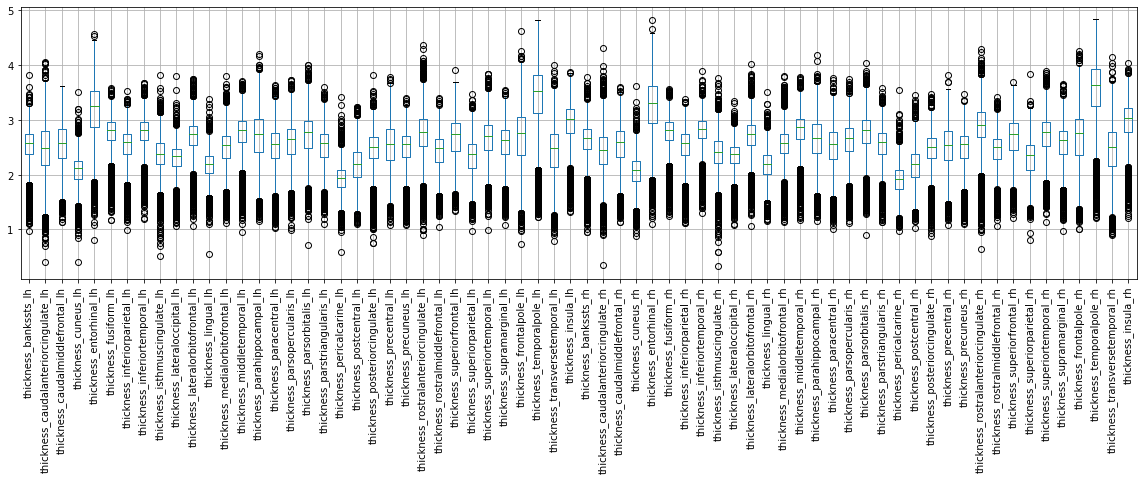

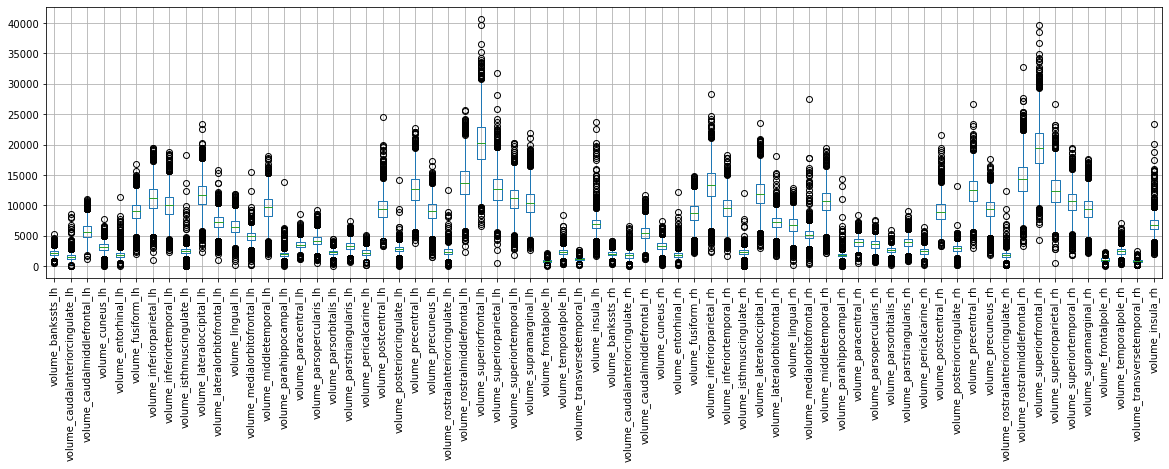

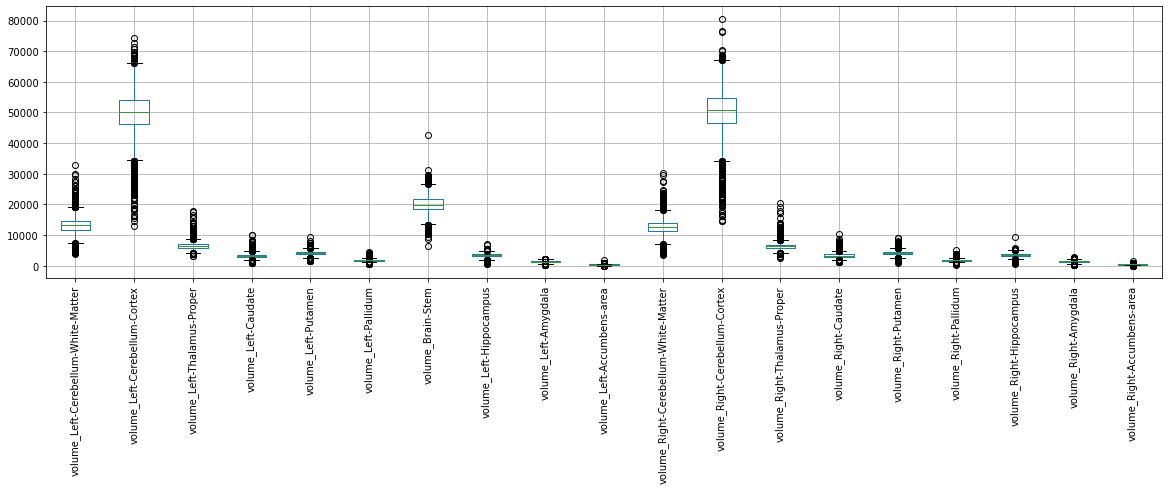

In [18]:
# print all output without truncating
pd.options.display.max_rows = 4000
for feats in [features_cort, features_vol, features_vol_extra]:
    tmp_df = nacc_df.loc[:, feats]
    
    # print mean and sd for each region
    #print(tmp_df.apply(np.mean, 0))
    #print(tmp_df.apply(np.std, 0))
    
    plt.figure(figsize=(20, 5))
    tmp_df.boxplot(rot=90)

    plt.show()
    plt.close()

In [19]:
nacc_df.to_csv('nacc_raw_filtered.csv')

## Processing data as with ADNI

In [20]:
import statsmodels.api as smf

from sklearn.preprocessing import StandardScaler
import joblib 

def calculate_residuals(data, columns, name_regress):
    for c in columns:
        lin_model = smf.load(f'../regress_models/{name_regress}_{c}.pkl')
        
        data[c] = data[c] - lin_model.predict(data)

In [21]:
nacc_df

,diagnosis,session_diff,age,gender,eTIV,nacmmse,digif,digib,animals,trialsb,...,volume_Right-WM-hypointensities,volume_non-WM-hypointensities,volume_Left-non-WM-hypointensities,volume_Right-non-WM-hypointensities,volume_Optic-Chiasm,volume_CC_Posterior,volume_CC_Mid_Posterior,volume_CC_Central,volume_CC_Mid_Anterior,volume_CC_Anterior
subj,,,,,,,,,,,,,,,,,,,,,
34,AD,291,81,Female,1.428260e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,232.3,760.4,386.3,339.4,324.4,710.5
225,OD,0,77,Male,1.461785e+06,24.0,4.0,5.0,19.0,NaN,...,0,0.0,0,0,183.9,879.9,455.5,387.5,333.2,753.0
511,AD,335,77,Female,1.584573e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,247.9,915.4,495.1,518.4,492.3,896.5
531,OD,334,62,Male,1.824642e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,309.5,1242.5,597.0,552.0,543.3,1086.6
920,Control,572,64,Female,1.449166e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,157.3,1061.3,504.5,376.8,508.7,737.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999346,AD,1021,69,Male,1.669576e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,243.5,1208.2,498.5,445.0,365.6,872.3
999546,Control,420,78,Male,1.478121e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,128.5,1312.6,586.1,554.5,543.0,881.1
999566,OND,30,53,Female,1.197214e+06,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0,152.9,893.6,499.9,388.1,379.0,771.3


In [22]:
nacc_df = pd.read_csv('nacc_raw_filtered.csv', index_col=0)

In [23]:
# Calculate residuals for NACC data (load model and calculate from previously fitted adni data)
calculate_residuals(data=nacc_df, columns=features_cort, name_regress='adni')
calculate_residuals(data=nacc_df, columns=features_vol+features_vol_extra, name_regress='adni')

In [24]:
scaler = joblib.load('adni_train_scaler.joblib')
#scaler.mean_

In [25]:
nacc_df = nacc_df.loc[:, features_cort + features_vol + features_vol_extra]

In [26]:
nacc_scaled = pd.DataFrame(scaler.transform(nacc_df), columns=nacc_df.columns, index=nacc_df.index)

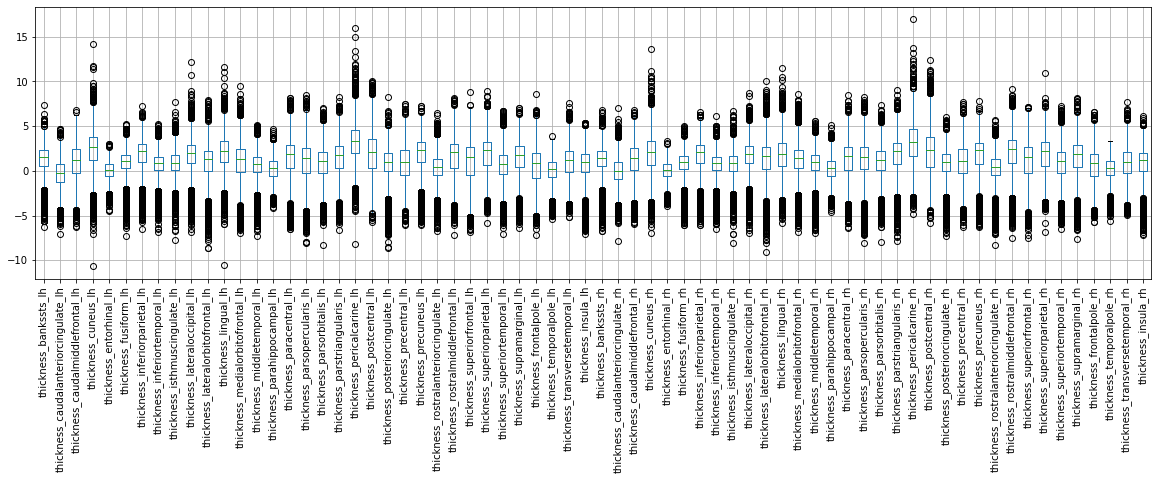

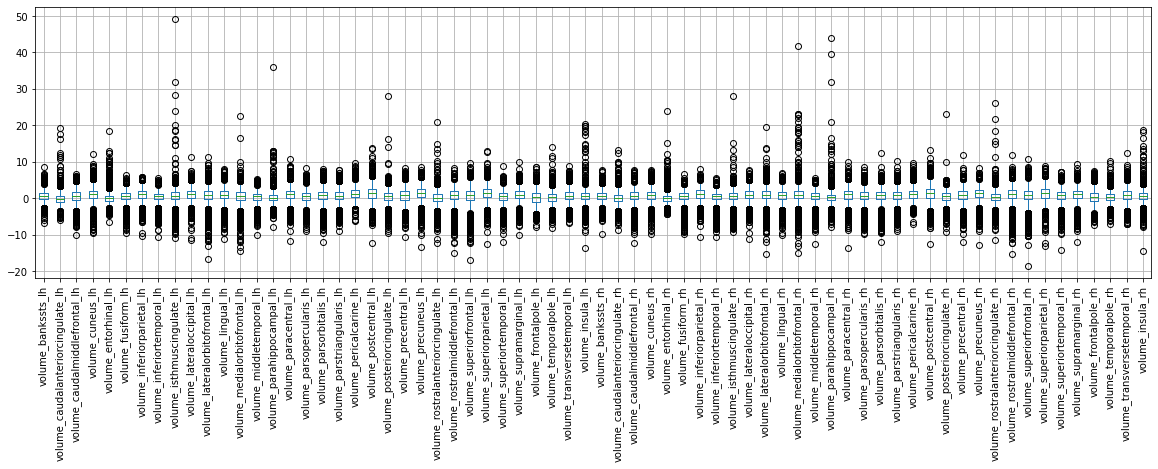

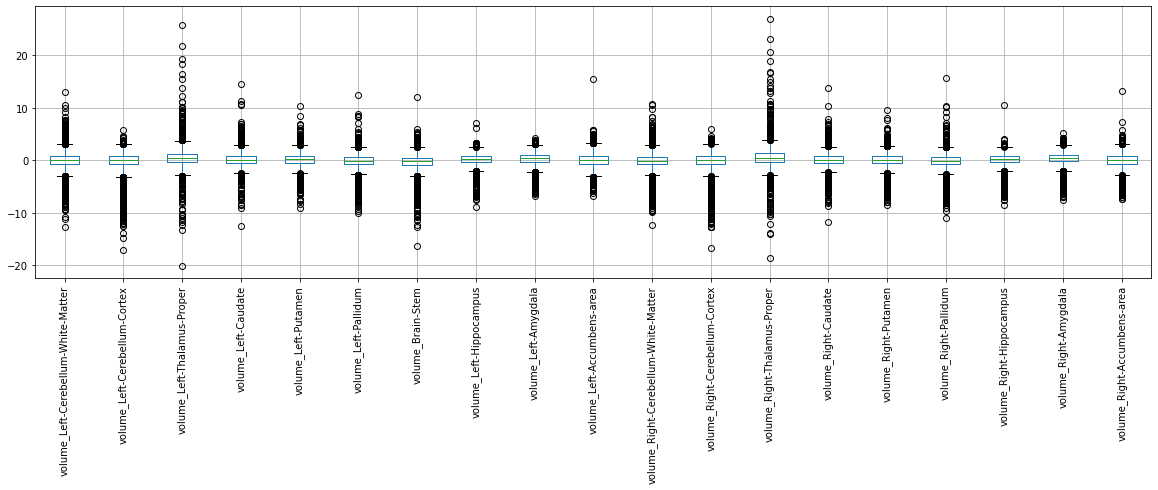

In [27]:
for feats in [features_cort, features_vol, features_vol_extra]:
    tmp_df = nacc_scaled.loc[:, feats]
    
    plt.figure(figsize=(20, 5))
    tmp_df.boxplot(rot=90)

    plt.show()
    plt.close()

In [28]:
nacc_scaled.to_csv('nacc_scaled_corrected.csv')